<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## FLEXPART footprint emission products for analysing black carbon (BC) measurements

The ATMO-ACCESS Virtual Access Portal gives access to Footprint analysis tools for ground based aerosol measurements. Through the portal you can request model runs to produce data products (e.g. footprint, source contributions) for your decided locations, or search and use the already produced products. 
Access the ATMO-ACCESS Virtual Services: https://www.atmo-access.eu/virtual-access/ 


This example plots the footprint emission sensitivity for analysing black carbon (BC) measurements at a given facility. The products are produced using FLEXPART model and include footprint analysis for the air mass arriving at the station on 3 hour time resolution 20 days back in time. The footprint emissions sensitivity showing the probability of any release occurring in any grid-cell to reach the receptor (station) for 30 days particle tracking. There is also modelled source analysis available for some of the products. More documentation of the products are available at https://flexpart-request.nilu.no/data-access. 

If you are interested in combining timeseries of modelled source analysis of black carbon with measured black carbon, have a look at example "FLEXPART and observed timeseries.ipynb"

### Import libraries

In [ ]:
import sys
import numpy as np
from netCDF4 import Dataset
import requests
import io
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm, maskoceans
from matplotlib.colors import LinearSegmentedColormap

### Settings for FLEXPART footprint emission sensitvity

Choose the settings you want for your FLEXPART footprint emission sensitivity plot. You can choose facility, year, month, altidute, day and hourly interval. Lastly you can choose the projection you want for the footprint.

**Facilities to choose from:**

NO0042G - Zeppelin mountain (Ny-Ålesund) *(https://data.actris.eu/facility/w2kl)*

FI0050R - Hyytiälä *(https://data.actris.eu/facility/ko6m)*

FR0030R - Puy de Dôme *(https://data.actris.eu/facility/do7b)*

CZ0003R - Kosetice (NAOK) *(https://data.actris.eu/facility/p797)*

GR0002R - Finokalia *(https://data.actris.eu/facility/wdd9)*

CH0002R - Payerne *(https://data.actris.eu/facility/7tbf)*

CH0001G - Jungfraujoch *(https://data.actris.eu/facility/mmee)*

GR0100B - Athens Demokritos *(https://data.actris.eu/facility/ekme)*

ES0018G - Izana *(https://data.actris.eu/facility/flqs)*

IT0009R - Monte Cimone *(https://data.actris.eu/facility/7uqv)*

NO0002R - Birkenes II *(https://data.actris.eu/facility/9cxe)*

ES0100R - El Arenosillo *(https://data.actris.eu/facility/3pb5)*

GR0101R - Helmos Mountain *(https://data.actris.eu/facility/n1rx)*

DE0043G - Hohenpeissenberg *(https://data.actris.eu/facility/rhhz)*

DE0044R - Melpitz *(https://data.actris.eu/facility/fhhq)*

ES0019U - Barcelona (Palau Reial) *(https://data.actris.eu/facility/hcwo)*

ES0020U - Granada *(https://data.actris.eu/facility/5qss)*

FR0020R - SIRTA - Orme des Merisiers *(https://data.actris.eu/facility/aswe)*

IT0004R - Ispra *(https://data.actris.eu/facility/j133)*

IT0013R - Potenza *(https://data.actris.eu/facility/epdw)*

RO0007R - Bucharest I *(https://data.actris.eu/facility/ab2x)*

FR0026R - La Réunion - Maïdo atmospheric observatory *(https://data.actris.eu/facility/ka8v)*

In [2]:
# SETTINGS, FEEL FREE TO CHANGE AND ADAPT TO YOUR NEEDS
STATION = "DE0043G" # GIVE STATION CODE
# NOTE stations DE0043G    DE0044R    ES0019U    ES0020U    FR0020R    IT0004R    IT0013R    RO0007R FR0026R are lidar and for these ALT>0 is allowed [0, 100, 500, 4000]
YEAR = 2023# GIVE YEAR
MON = 7 # GIVE MONTH
ALT = 100 # GIVE ALTITUDE
DD = 20 # GIVE DAY
TT = 12 # GIVE THE TIME IN 3 HOURLY INTERVALS LIKE 0, 3, 6, ..., 21
PROJ = "REGIONAL" # GIVE THE PROJECTION YOU WANT TO SEE: CHOOSE BETWEEN GLOBAL, REGIONAL, POLAR 

##### DO NOT CHANGE BELOW THIS UNLESS YOU KNOW WHAT YOU DO #####
# Available stations and their coordinates
STNLIST = ["NO0042G", "FI0050R", "FR0030R", "CZ0003R", "GR0002R", "CH0002R", "CH0001G", "GR0100B", "ES0018G", "IT0009R", "NO0002R", "ES0100R", "GR0101R","DE0043G", "DE0044R", "ES0019U", "ES0020U", "FR0020R", "IT0004R", "IT0013R", "RO0007R", "FR0026R"]
LONLIST = [11.88668, 24.283333, 2.964886, 15.080278, 25.669399, 6.944722, 7.985, 23.816, -16.4994, 10.7, 8.252, -6.733, 22.196262, 11.009619, 12.9277, 2.116111, -3.605, 2.158889, 8.633333, 15.7237, 26.029, 55.383]
LATLIST = [78.90715, 61.85, 45.772223, 49.573394, 35.337799, 46.813056, 46.5475, 37.994999, 28.309, 44.183333, 58.38853, 37.1, 37.984265, 47.801498, 51.5255, 41.39, 37.164, 48.708611, 45.8, 40.601, 44.348, -21.0794]
ALTLIST = [0, 100, 500, 4000, 6000]

In [3]:
# Find coordinates of the station given in SETTINGS
xx = []; yy = []
for i in range(len(STNLIST)):
    if STNLIST[i] == STATION:
        xx.append(LONLIST[i])
        yy.append(LATLIST[i])

print("The coordinates of",STATION, "are",xx, "and",yy)

The coordinates of DE0043G are [11.009619] and [47.801498]


In [5]:
# Find altitude of the station given in SETTINGS
zz1 = []; zz2 = []
for i in range(len(ALTLIST)):
    if ALTLIST[i] == ALT:
        zz1.append(ALTLIST[i])
        zz2.append(ALTLIST[i+1])

print("The altitude of",STATION, "is",zz1, "and",zz2)

The altitude of DE0043G is [100] and [500]


In [6]:

# Set datetime objects dat and datE
dat = datetime(YEAR,MON,DD,TT)
datE = dat + timedelta(hours=3)

# Define the start and end of the month
start_date = datetime(YEAR, MON, 1, 0, 0) # Start at midnight on the first day
# Find the first day of the next month to mark the end
if MON == 12:
    end_date = datetime(YEAR + 1, 1, 1, 0, 0) # If December, next month is January of the next year
else:
    end_date = datetime(YEAR, MON + 1, 1, 0, 0) # Otherwise, just increment the month

time_steps = []
current_time = start_date
while current_time < end_date:
    time_steps.append(current_time)
    current_time += timedelta(hours=3)


#print(ddlist)
target_datetime = datetime(YEAR,MON,DD,TT)

In [7]:
# Find the index of the specific datetime within the list
try:
    idx = time_steps.index(target_datetime)+1
    print(f"The index of {target_datetime} is {idx}.")
except ValueError:
    print(f"{target_datetime} is not in the list of time steps.")

print("The index of ", dat, "within a month is", idx)

The index of 2023-07-20 12:00:00 is 157.
The index of  2023-07-20 12:00:00 within a month is 157


In [8]:
# URL of the NetCDF file (example URL)
url = 'https://atmo-access.nilu.no/WEBPLOTS/' + str(STATION) + '/' + str(YEAR) + '/' + \
'OUT_' + str(YEAR) + str(MON).zfill(2) + '_' + str(ALT) + '/' + 'ECMWF/regional_footprint_a/OUT_'+ \
str(YEAR) + str(MON).zfill(2) + '_' + str(ALT) +'.regional_footprint_a_'+str(idx)+'.nc'
print("File is taken from", url)

File is taken from https://atmo-access.nilu.no/WEBPLOTS/DE0043G/2023/OUT_202307_100/ECMWF/regional_footprint_a/OUT_202307_100.regional_footprint_a_157.nc


In [9]:
# Function to read the NetCDF file from the internet
def read_netcdf_from_url(url):
    try:
        # Send a GET request to download the file
        response = requests.get(url)
        response.raise_for_status() # Raise an exception for HTTP errors
        
        # Open the file from the response content using an in-memory bytes buffer
        with io.BytesIO(response.content) as data:
            # Open the dataset from the byte stream
            ds = Dataset('inmemory.nc', mode='r', memory=data.read())
            # Print basic information about the dataset
            print(ds) 
            # Example: List variables in the dataset
            print("Variables in the dataset:")
            print(list(ds.variables.keys()))
            lons = ds.variables['longitude'][:]
            lats = ds.variables['latitude'][:]
            foot = ds.variables['footprint'][:]
            
            # Close the dataset when done
            ds.close()
            print("NetCDF file processed successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the NetCDF file: {e}")
    except Exception as e:
        print(f"Error reading the NetCDF file: {e}")
    return lons, lats, foot

# Call the function to read the NetCDF file from the URL
lons, lats, foot = read_netcdf_from_url(url)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    author: Nikolaos Evangeliou
    contact: ne@nilu.no
    created_date_UTC: 19-03-2024
    created_hour_UTC: 02:49:02
    institution: Norsk Institute for Luftforskning
    description: Creates 2D netCDF from a pre-existing array
    history: Created by NE
    source: netCDF4 python module
    coordinates: latitude longitude
    dimensions(sizes): latitude(360), longitude(720)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 footprint(latitude, longitude)
    groups: 
Variables in the dataset:
['latitude', 'longitude', 'footprint']
NetCDF file processed successfully.


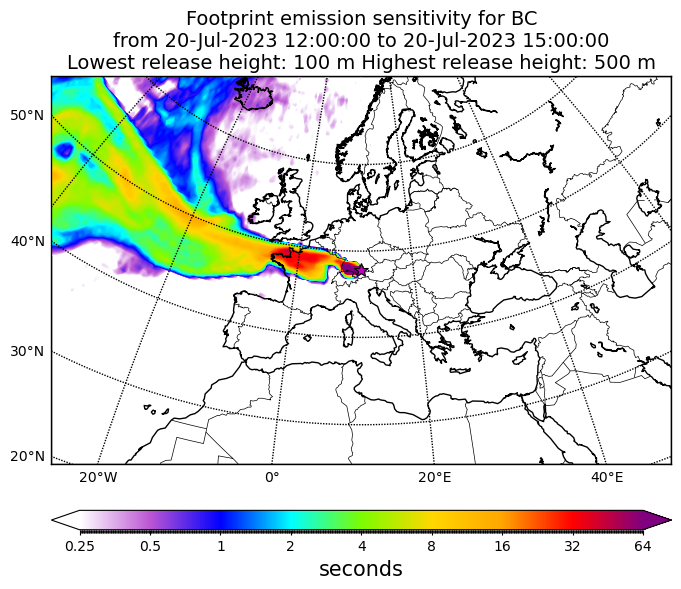

In [26]:
######## MAKE PLOT ########
def plot(dat,datE,xx,yy,lons,lats,zpoint1,zpoint2,var,area='GLOBAL'):
    fig = plt.figure(figsize=(8,7.5))  # Ensure fig is defined
    ax = fig.add_subplot(111)
    ax.set_title('Footprint emission sensitivity for BC'+'\nfrom '+ dat.strftime("%d-%b-%Y %H:%M:%S")+' to '+datE.strftime("%d-%b-%Y %H:%M:%S")+'\nLowest release height: '+str(int(zpoint1))+' m Highest release height: '+str(int(zpoint2))+' m',fontsize=14)
    
    if area == 'GLOBAL':
        m = Basemap(projection='robin',lon_0=0,resolution='l')

    elif area == 'REGIONAL':
        m = Basemap(width=8000000,height=5000000,resolution='l',projection='stere',lat_ts=60.,lat_0=yy,lon_0=xx)

    elif area == 'POLAR':
        h = 10000.
        m = Basemap(projection='nsper',lon_0=xx,lat_0=90.,satellite_height=h*1000.,resolution='l')

    else:
        print("Error")
        sys.exit()

    lon, lat = np.meshgrid(lons, lats)
    xi, yi = m(lon, lat)
    
    levs = np.arange(-2,6.01,0.01)
    clevs = 2**levs
    boundlevs = [str(('%.2f' % v).rstrip('0').rstrip('.')) if v <=1 else str(int(round(v))) for v in clevs]
    
    m.drawcoastlines()
    if area == 'GLOBAL' or area == 'POLAR':
        m.drawparallels(np.arange(-90.,91.,30.), labels=[1,0,0,0], fontsize=10)
        m.drawmeridians(np.arange(-180.,181.,60.), labels=[0,0,0,1], fontsize=10)
    elif area == 'REGIONAL':
        m.drawparallels(np.arange(-90.,91.,10.), labels=[1,0,0,0], fontsize=10)
        m.drawmeridians(np.arange(-180.,181.,20.), labels=[0,0,0,1], fontsize=10)
    m.drawmapboundary()
    m.drawcountries()
    
    colors = ["purple", "red", "orange", "gold", "lawngreen", "cyan", "blue", "mediumorchid", "white"]
    cmap = LinearSegmentedColormap.from_list("cb_friendly", colors[::-1], N=900)
    norm = cm.colors.BoundaryNorm(boundaries=clevs,ncolors=cmap.N)

    cs = ax.contourf(xi, yi, var[:, :], clevs, cmap=cmap, extend='both', norm=norm)
    cbar = m.colorbar(cs,ticks=clevs[::100],location='bottom', pad="12%")
    cbar.set_label('seconds',fontsize=15)
    cbar.ax.set_xticklabels(boundlevs[::100])
    
    aa1,bb1= m(xx, yy)
    m.plot(aa1, bb1, marker='*', markersize=10, markeredgecolor='k',markeredgewidth=0.8,markerfacecolor='m',linestyle='')
    plt.show()

# PLOT IT        
plot(dat,datE,xx[0],yy[0],lons,lats,zz1[0],zz2[0],foot,area=PROJ)

If you want to compare modelled source analysis of black carbon together with measured black carbon, have a look at example "FLEXPART and observed timeseries.ipynb"